In [1]:
import nltk
import random
import time

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

In [3]:
%matplotlib inline

In [4]:
g_times = list()
g_times.append(time.time())

In [5]:
treebank_sents = list(nltk.corpus.treebank.tagged_sents())
print (len(treebank_sents))

random.shuffle(treebank_sents)

test_train_split = 3200
train_sents = treebank_sents[:test_train_split]
test_sents = treebank_sents[test_train_split:]

3914


In [6]:
def num_tokens(tagged_sents):
    return sum([len(s) for s in tagged_sents])

In [7]:
def default_backoff_tagger(train_sents):
    tags = [tag for sent in treebank_sents for (word, tag) in sent]
    nltk.DefaultTagger(nltk.FreqDist(tags).max())

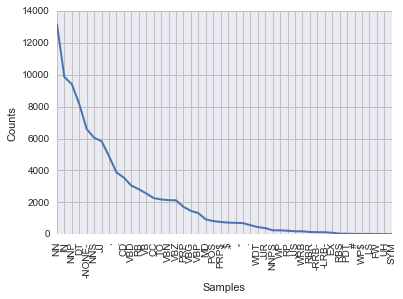

In [8]:
tags = [tag for sent in treebank_sents for (word, tag) in sent]
fd = nltk.FreqDist(tags)
fd.plot()

In [9]:
class TnTTagger(object):   
    def __init__(self, train_size):
        self.train_size = train_size
    
    def train(self, train_sents):
        train_sents = train_sents[:self.train_size]
        self.tokens_size = num_tokens(train_sents)
        
        t0 = default_backoff_tagger(train_sents)
        
        self._tagger = nltk.tag.tnt.TnT(unk=t0)
        self._tagger.train(train_sents)
        
    def test(self, test_sents):
        return self._tagger.evaluate(test_sents)

In [10]:
class TrigramTagger(object): 
    def __init__(self, train_size):
        self.train_size = train_size

    def train(self, train_sents):
        train_sents = train_sents[:self.train_size]
        self.tokens_size = num_tokens(train_sents)
        
        t0 = default_backoff_tagger(train_sents)
        t1 = nltk.tag.UnigramTagger(train_sents, backoff=t0)
        t2 = nltk.tag.BigramTagger(train_sents, backoff=t1)
        
        self._tagger = nltk.tag.TrigramTagger(train_sents, backoff=t2)
        
    def test(self, test_sents):
        return self._tagger.evaluate(test_sents)

In [11]:
class BigramTagger(object): 
    def __init__(self, train_size):
        self.train_size = train_size

    def train(self, train_sents):
        train_sents = train_sents[:self.train_size]
        self.tokens_size = num_tokens(train_sents)
        
        t0 = default_backoff_tagger(train_sents)
        t1 = nltk.tag.UnigramTagger(train_sents, backoff=t0)
        
        self._tagger = nltk.tag.BigramTagger(train_sents, backoff=t1)
        
    def test(self, test_sents):
        return self._tagger.evaluate(test_sents)

In [12]:
class UnigramTagger(object):
    def __init__(self, train_size):
        self.train_size = train_size
    
    def train(self, train_sents):
        train_sents = train_sents[:self.train_size]
        self.tokens_size = num_tokens(train_sents)
        
        t0 = default_backoff_tagger(train_sents)
        
        self._tagger = nltk.tag.UnigramTagger(train_sents, backoff=t0)
        
    def test(self, test_sents):
        return self._tagger.evaluate(test_sents)

In [13]:
taggers = []
for i in range(1, 6):
    train_size = i * 200
    taggers.append(TnTTagger(train_size))
    taggers.append(TrigramTagger(train_size))
    taggers.append(BigramTagger(train_size))
    taggers.append(UnigramTagger(train_size))

In [14]:
train_times = []
for t in taggers:
    t0 = time.time()
    t.train(train_sents)
    train_times.append(time.time() - t0)
    print ("{:20}{:3.2f}".format(type(t).__name__, train_times[-1]))

TnTTagger           0.15
TrigramTagger       0.31
BigramTagger        0.19
UnigramTagger       0.10
TnTTagger           0.25
TrigramTagger       0.67
BigramTagger        0.32
UnigramTagger       0.17
TnTTagger           0.28
TrigramTagger       0.89
BigramTagger        0.46
UnigramTagger       0.23
TnTTagger           0.35
TrigramTagger       1.11
BigramTagger        0.57
UnigramTagger       0.24
TnTTagger           0.42
TrigramTagger       1.36
BigramTagger        0.66
UnigramTagger       0.27


In [15]:
accuracies = []
test_times = []
for t in taggers:
    t0 = time.time()
    accuracies.append(t.test(test_sents[:500]))
    test_times.append(time.time() - t0)
    print ("{:20}{:3.2f}".format(type(t).__name__, test_times[-1]))

TnTTagger           3.69
TrigramTagger       0.21
BigramTagger        0.17
UnigramTagger       0.14
TnTTagger           9.39
TrigramTagger       0.22
BigramTagger        0.28
UnigramTagger       0.19
TnTTagger           29.09
TrigramTagger       0.30
BigramTagger        0.21
UnigramTagger       0.16
TnTTagger           31.36
TrigramTagger       0.33
BigramTagger        0.18
UnigramTagger       0.13
TnTTagger           34.20
TrigramTagger       0.43
BigramTagger        0.25
UnigramTagger       0.20


In [16]:
g_times.append(time.time())
print (g_times[-1] - g_times[-2])

131.6073260307312


In [17]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

In [18]:
tagger_types = [type(t).__name__ for t in taggers]
tokens_sizes = [t.tokens_size for t in taggers]

test_runs = [('tagger_type', tagger_types),
             ('tokens_size', tokens_sizes),
             ('accuracy', accuracies),
             ('train_time', train_times),
             ('test_time', test_times)]

df = pd.DataFrame.from_items(test_runs)
grouped = df.groupby(['tagger_type'])

In [19]:
def my_plot(grouped, field):
    fig, ax = plt.subplots(figsize=(8,6))
    for key, grp in grouped:
        grp.plot(x='tokens_size', y=field, ax=ax, label=key)
    plt.legend(loc='best')    
    plt.show()

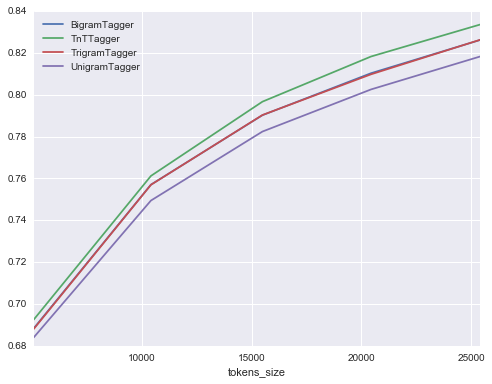

In [20]:
my_plot(grouped, 'accuracy')

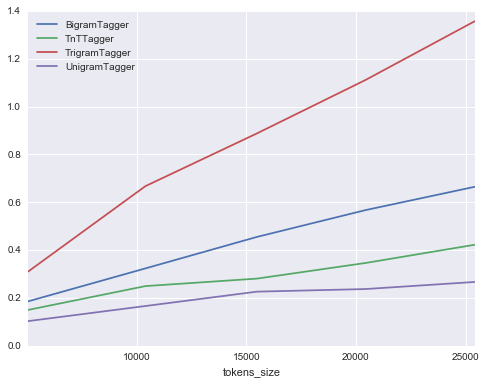

In [21]:
my_plot(grouped, 'train_time')

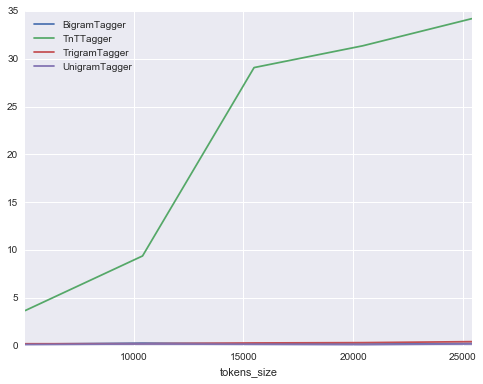

In [22]:
my_plot(grouped, 'test_time')

In [23]:
grouped.describe()

accuracy  test_time   tokens_size  train_time
tagger_type                                                       
BigramTagger  count  5.000000   5.000000      5.000000    5.000000
              mean   0.774394   0.218617  15359.000000    0.439434
              std    0.054606   0.046705   8022.731829    0.190414
              min    0.688322   0.173202   5059.000000    0.186001
              25%    0.757009   0.175917  10403.000000    0.323677
              50%    0.790214   0.214922  15487.000000    0.455310
              75%    0.810273   0.247034  20437.000000    0.567440
              max    0.826153   0.282009  25409.000000    0.664743
TnTTagger     count  5.000000   5.000000      5.000000    5.000000
              mean   0.780427  21.545285  15359.000000    0.289920
              std    0.056158  13.962520   8022.731829    0.102475
              min    0.692501   3.688554   5059.000000    0.150125
              25%    0.761188   9.393808  10403.000000    0.249696
              50%    0.796672  29.085648  15487.000000    0.280949
              75%    0.818251  31.360141  20437.000000    0.346310
              max    0.833523  34.198276  25409.000000    0.422522
TrigramTagger count  5.000000   5.000000      5.000000    5.000000
              mean   0.774242   0.298263  15359.000000    0.866975
              std    0.054668   0.092013   8022.731829    0.403009
              min    0.688018   0.213324   5059.000000    0.310588
              25%    0.756933   0.215021  10403.000000    0.667628
              50%    0.790289   0.297376  15487.000000    0.888128
              75%    0.809741   0.330700  20437.000000    1.111573
              max    0.826229   0.434896  25409.000000    1.356958
UnigramTagger count  5.000000   5.000000      5.000000    5.000000
              mean   0.767313   0.163211  15359.000000    0.200073
              std    0.053209   0.031316   8022.731829    0.065308
              min    0.683991   0.127705   5059.000000    0.103278
              25%    0.749411   0.138226  10403.000000    0.166370
              50%    0.782387   0.160203  15487.000000    0.226434
              75%    0.802523   0.192442  20437.000000    0.237342
              max    0.818251   0.197478  25409.000000    0.266942